In [24]:
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt
import os

In [25]:
directory = './city_route_data'


dataframes = []


for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        city_name = filename.split('_')[0]
        df = pd.read_csv(os.path.join(directory, filename))
        df['city'] = city_name      
        dataframes.append(df)


combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,geometry,id,previousId,sendingTime,created,tasks,startTime,endTime,direction,domain,source,10k,500m,100m,city
0,LINESTRING Z (382792.8269070398 6681596.579753...,99005883.0,99005516.0,2024-03-21 09:40:25+00:00,2024-03-21 09:42:29+00:00,['BRUSHING'],2024-03-21 09:40:26+00:00,2024-03-21 09:42:44+00:00,NaN,state-roads,Harja/Väylävirasto,True,False,False,Helsinki
1,LINESTRING Z (382948.0572126591 6681233.182414...,99006112.0,99005883.0,2024-03-21 09:42:43+00:00,2024-03-21 09:45:32+00:00,['BRUSHING'],2024-03-21 09:42:44+00:00,2024-03-21 09:45:03+00:00,NaN,state-roads,Harja/Väylävirasto,True,False,False,Helsinki
2,LINESTRING Z (383086.4150439428 6680904.102038...,99006416.0,99006112.0,2024-03-21 09:45:02+00:00,2024-03-21 09:47:34+00:00,['BRUSHING'],2024-03-21 09:45:03+00:00,2024-03-21 09:47:25+00:00,NaN,state-roads,Harja/Väylävirasto,True,False,False,Helsinki
3,LINESTRING Z (383223.4481512637 6680576.073527...,99006644.0,99006416.0,2024-03-21 09:47:24+00:00,2024-03-21 09:49:36+00:00,['BRUSHING'],2024-03-21 09:47:25+00:00,2024-03-21 09:49:56+00:00,NaN,state-roads,Harja/Väylävirasto,True,False,False,Helsinki
4,LINESTRING Z (383363.6754609799 6680246.612000...,99006931.0,99006644.0,2024-03-21 09:49:55+00:00,2024-03-21 09:52:38+00:00,['BRUSHING'],2024-03-21 09:49:56+00:00,2024-03-21 09:52:57+00:00,NaN,state-roads,Harja/Väylävirasto,True,False,False,Helsinki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85928,LINESTRING Z (230779.9978007611 7004966.776488...,106342587.0,106342409.0,2024-05-29 11:44:00+00:00,2024-05-29 11:44:56+00:00,['BRUSHING'],2024-05-29 11:41:59+00:00,2024-05-29 11:41:59+00:00,262.0,state-roads,Harja/Väylävirasto,True,False,False,Vaasa
85929,POINT Z (230790.4156419555 7004899.886846547 0),106343583.0,NaN,2024-05-29 11:53:00+00:00,2024-05-29 11:53:03+00:00,['BRUSHING'],2024-05-29 11:50:41+00:00,2024-05-29 11:50:41+00:00,346.0,state-roads,Harja/Väylävirasto,True,False,False,Vaasa
85930,LINESTRING Z (230794.1576835368 7004969.850321...,106344716.0,NaN,2024-05-29 12:03:00+00:00,2024-05-29 12:03:11+00:00,['BRUSHING'],2024-05-29 12:00:46+00:00,2024-05-29 12:01:49+00:00,0.0,state-roads,Harja/Väylävirasto,True,False,False,Vaasa
85931,LINESTRING Z (230791.2777787513 7004972.439957...,106344826.0,106344716.0,2024-05-29 12:04:00+00:00,2024-05-29 12:04:12+00:00,['BRUSHING'],2024-05-29 12:01:49+00:00,2024-05-29 12:02:09+00:00,110.0,state-roads,Harja/Väylävirasto,True,False,False,Vaasa


In [26]:
df = combined_df
df["endTime"] = pd.to_datetime(df["endTime"])
df["startTime"] = pd.to_datetime(df["startTime"])

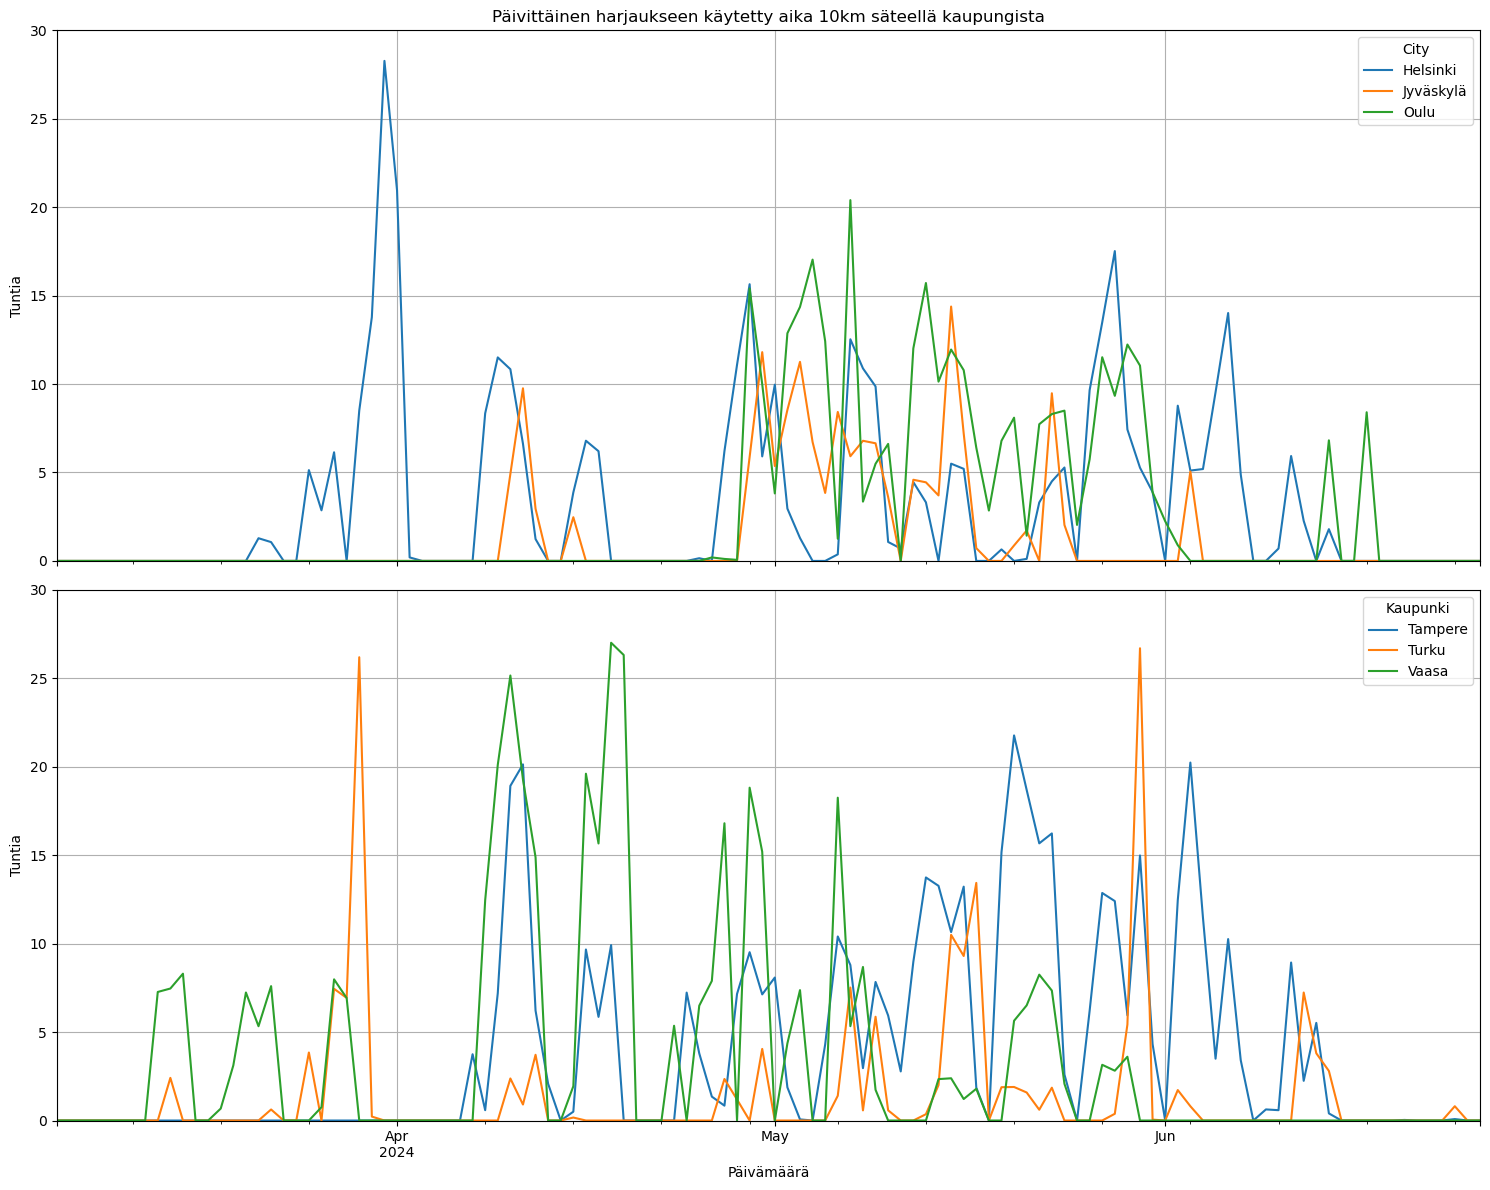

In [47]:
df['timeDiff'] = (df['endTime'] - df['startTime']).dt.total_seconds() / 3600


df['date'] = df['startTime'].dt.date

daily_sum = df.groupby(['date', 'city'])['timeDiff'].sum().reset_index()

date_range = pd.date_range(start='2024-03-05', end='2024-06-26')

pivot_df = daily_sum.pivot(index='date', columns='city', values='timeDiff').reindex(date_range, fill_value=0)

pivot_df = pivot_df.fillna(0)

cities = pivot_df.columns
group1 = cities[:3]
group2 = cities[3:]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)


pivot_df[group1].plot(ax=ax1)
ax1.set_title('Päivittäinen harjaukseen käytetty aika 10km säteellä kaupungista')
ax1.set_ylabel('Tuntia')
ax1.legend(title='City')
ax1.grid()
ax1.set_ylim(0,30)
pivot_df[group2].plot(ax=ax2)
# ax2.set_title('Daily Sum of Time Differences for Group 2 Cities')
ax2.set_xlabel('Date')
ax2.set_ylabel('Tuntia')
ax2.legend(title='Kaupunki')
ax2.grid()
ax2.set_ylim(0,30)

plt.xlabel('Päivämäärä')
plt.tight_layout()
plt.show()
# plt.figure(figsize=(15, 8))

# plt.plot(pivot_df)

# plt.xlabel('Päivämäärä')
# plt.ylabel('Tuntia')
# plt.title('Päivittäinen harjaukseen käytetty aika 10km säteellä kaupungista')
# plt.legend(pivot_df.columns, title='City')
# plt.grid(True)
# plt.ylim(0,30)
# plt.show()